In [3]:
!pip install -q kaggle pandas scikit-learn

In [4]:
from google.colab import drive
import os

# 1. Conectar ao seu Google Drive
drive.mount('/content/drive')

# 2. Configurar a pasta do Kaggle no ambiente do Colab
!mkdir -p ~/.kaggle

# 3. Copiar o arquivo json do Drive para a pasta correta (ajuste o caminho se necessário)
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# 4. Baixar o dataset
!kaggle datasets download -d uciml/red-wine-quality-cortez-et-al-2009

# 5. Descompactar
!unzip red-wine-quality-cortez-et-al-2009.zip

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset URL: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009
License(s): DbCL-1.0
red-wine-quality-cortez-et-al-2009.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  red-wine-quality-cortez-et-al-2009.zip
replace winequality-red.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: winequality-red.csv     


In [5]:
import pandas as pd

df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
# Criando novas colunas para enriquecer o dataset
df['acid_ratio'] = df['fixed acidity'] / df['volatile acidity']
df['free_sulfur_ratio'] = df['free sulfur dioxide'] / df['total sulfur dioxide']
df['sugar_alcohol_interaction'] = df['residual sugar'] * df['alcohol']
df['density_ph_ratio'] = df['density'] / df['pH']

print(f"Total de colunas agora: {len(df.columns)}")

Total de colunas agora: 16


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# 1. Definindo X e y
X = df.drop('quality', axis=1)
y = df['quality']

# 2. Divisão treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Padronização (A "mágica" para melhorar os números)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Treinando o modelo com os dados padronizados
modelo = LinearRegression()
modelo.fit(X_train_scaled, y_train)

# 5. Fazendo previsões
previsoes = modelo.predict(X_test_scaled)

print("Modelo atualizado e treinado com dados padronizados!")

Modelo atualizado e treinado com dados padronizados!


In [31]:
from sklearn.metrics import classification_report

# Definindo as categorias reais (Gabarito)
y_test_cat = (y_test >= 6).astype(int)

# Se a previsão for >= 5, consideramos "Bom"
previsoes_cat = (previsoes >= 5.5).astype(int)

print("=== Relatório de Classificação Atualizado ===")
print(classification_report(y_test_cat, previsoes_cat, target_names=['Ruim (<5.5)', 'Bom (>=5.5)']))

=== Relatório de Classificação Atualizado ===
              precision    recall  f1-score   support

 Ruim (<5.5)       0.71      0.73      0.72       141
 Bom (>=5.5)       0.78      0.77      0.77       179

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320



/tmp/ipython-input-2681222818.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Peso', y='Atributo', data=importancia, palette='coolwarm')


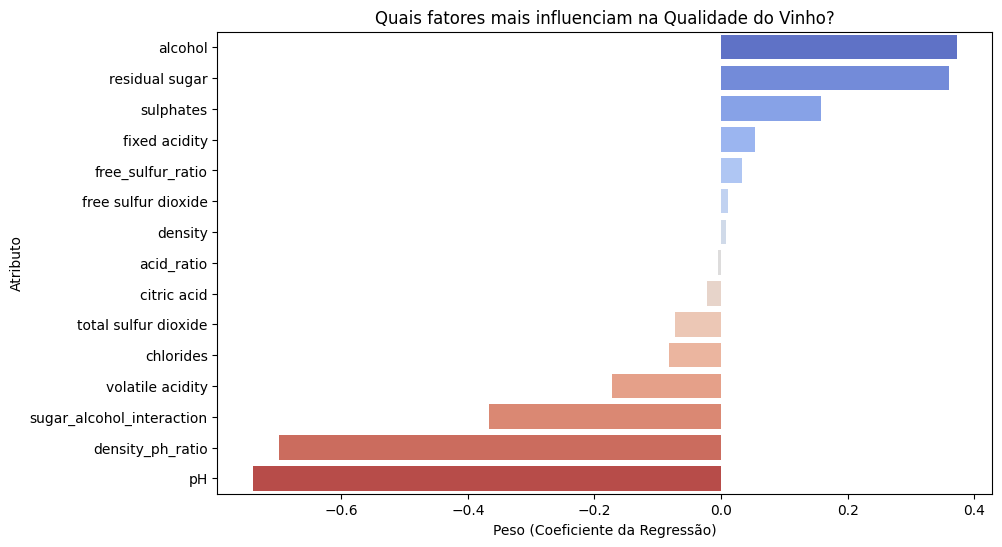

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extrair os coeficientes do modelo
importancia = pd.DataFrame({
    'Atributo': X.columns,
    'Peso': modelo.coef_
}).sort_values(by='Peso', ascending=False)

# Plotar
plt.figure(figsize=(10, 6))
sns.barplot(x='Peso', y='Atributo', data=importancia, palette='coolwarm')
plt.title('Quais fatores mais influenciam na Qualidade do Vinho?')
plt.xlabel('Peso (Coeficiente da Regressão)')
plt.show()

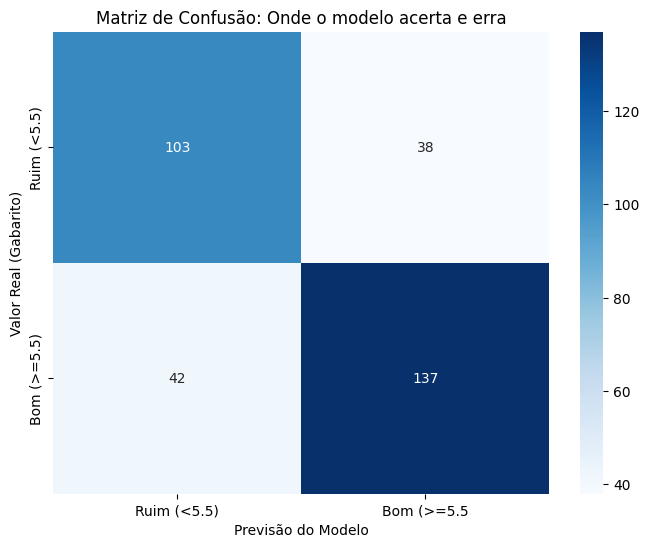

In [34]:
from sklearn.metrics import confusion_matrix

# Criar a matriz
cm = confusion_matrix(y_test_cat, previsoes_cat)

# Plotar com Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ruim (<5.5)', 'Bom (>=5.5'],
            yticklabels=['Ruim (<5.5)', 'Bom (>=5.5)'])
plt.xlabel('Previsão do Modelo')
plt.ylabel('Valor Real (Gabarito)')
plt.title('Matriz de Confusão: Onde o modelo acerta e erra')
plt.show()